In [1]:
import pandas as pd
import matplotlib.pyplot as plt
#import seaborn as sns
import numpy as np

import dataset for training 


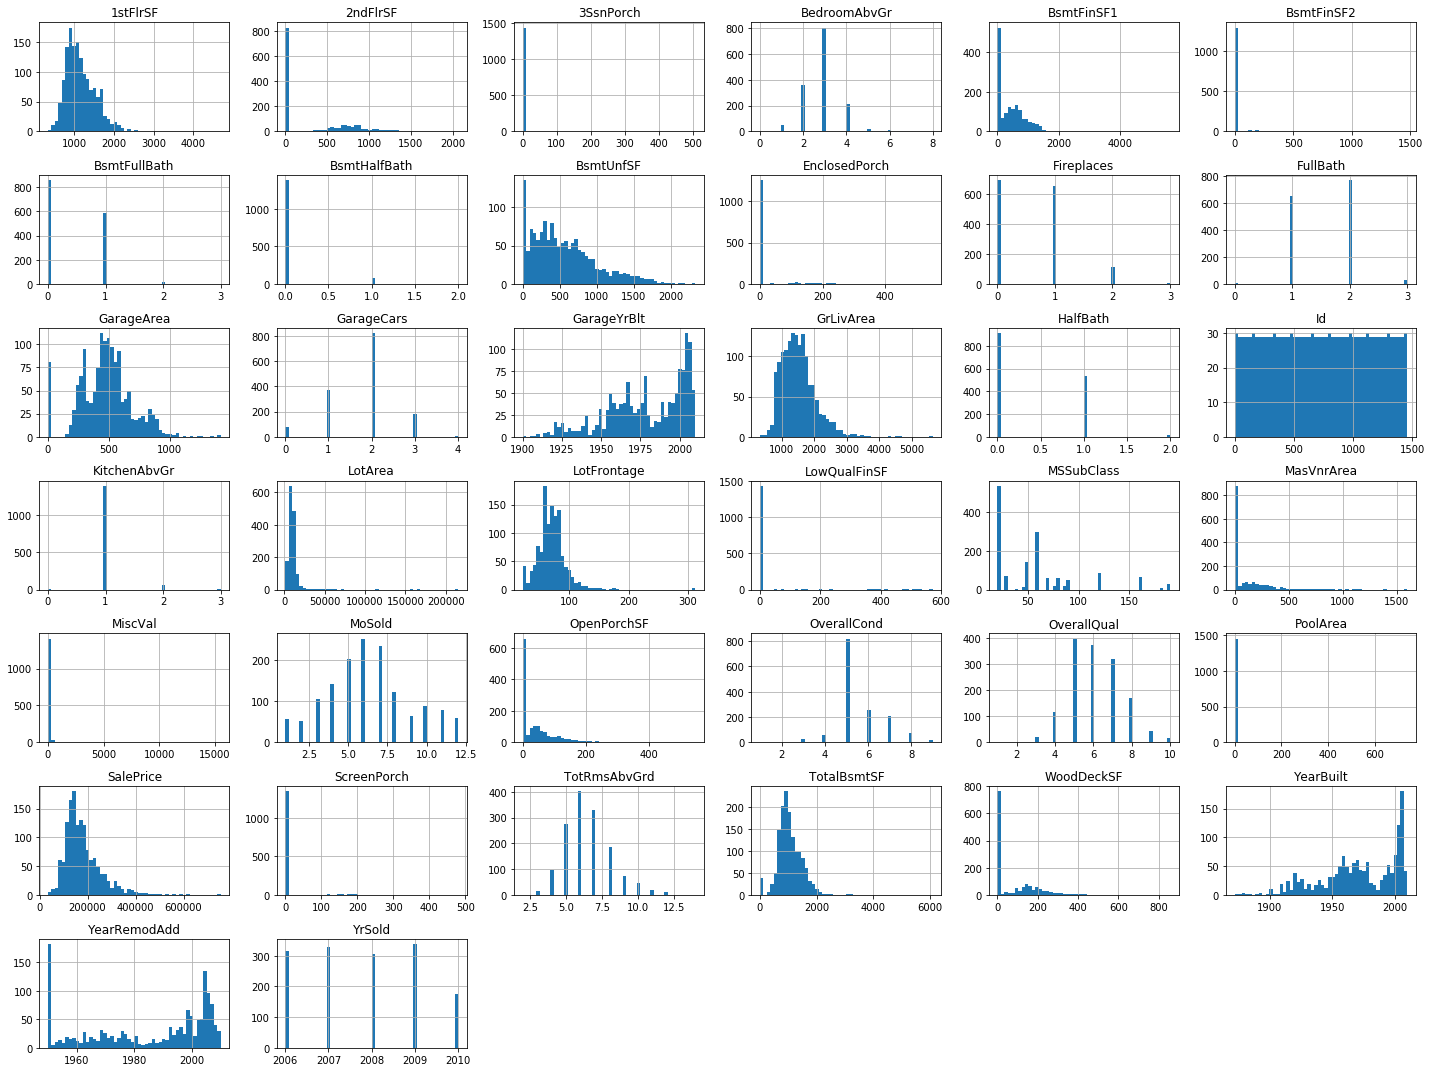

In [2]:
train_file_path = 'input/train.csv'
house_data = pd.read_csv(train_file_path)
house_data.hist(bins = 50, figsize = (20,15))
plt.tight_layout()
plt.show()


In [6]:
# go through all the features, check for those that are not listed on histogram


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


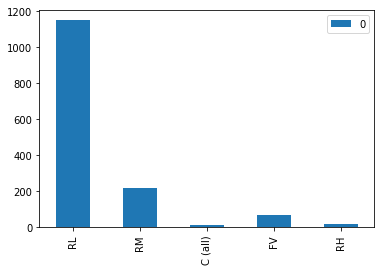

In [3]:
#notice several features are not numerical, do the conversions
import pandas
from collections import Counter
a = house_data["MSZoning"]
letter_counts = Counter(a)
df = pandas.DataFrame.from_dict(letter_counts, orient='index')
df.plot(kind='bar')

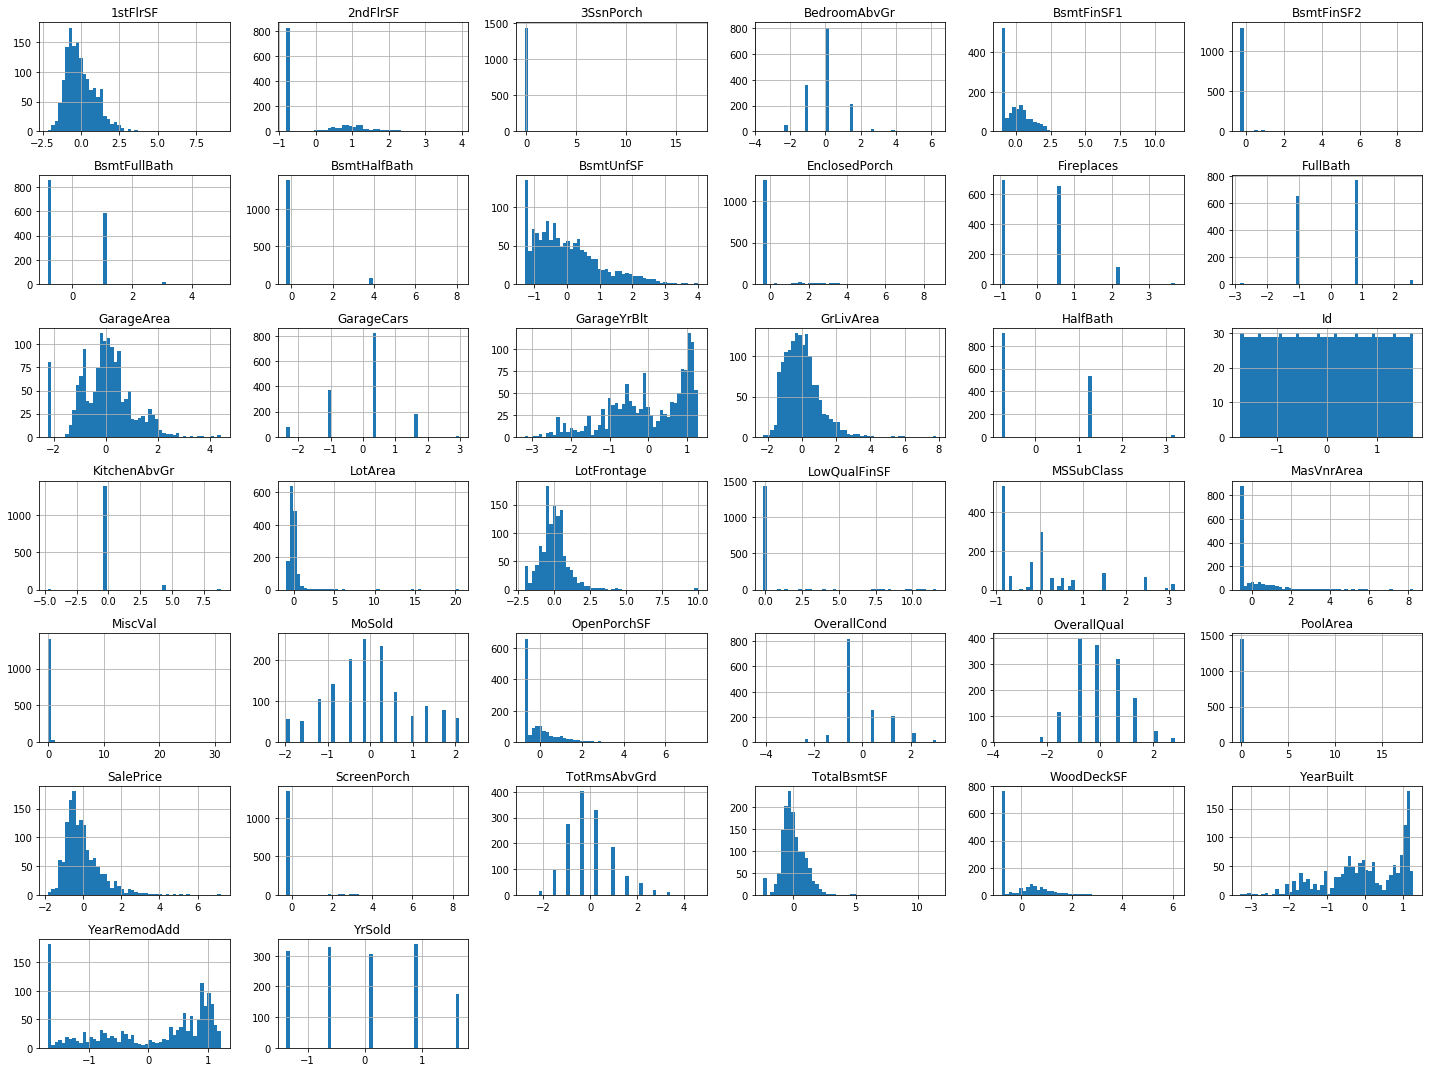

In [5]:

#split the data to test and training set

# from sklearn.model_selection import train_test_split
# train_set, test_set = train_test_split (house_data, test_size = 0.2, random_state = 42)

#Standarize the data

def Standarize_data(X):
    mean = X.mean()
    stdev = float(X.std())
    return (X-mean)/stdev
    
for _eachFeature in house_data:
    if house_data[_eachFeature].dtype != object:
        house_data[_eachFeature] = Standarize_data(house_data[_eachFeature])
        
house_data.hist(bins = 50, figsize = (20,15)) 
plt.tight_layout()
plt.show()



now oberserve the data above 
for the baseline, we might wanna discard several extreme features, such as
3ScnPorch, BsmtFinSF2 ...etc

In [4]:
#we believe sale_price will be an important factor so we wanna clean the data so it will refelct the original shape but at the
#same time being flatter and combined

house_data["cleanSalePrice"] = np.ceil(house_data["SalePrice"]/80000)
house_data["cleanSalePrice"].where(house_data["cleanSalePrice"] <= 4,5.0,inplace = True)

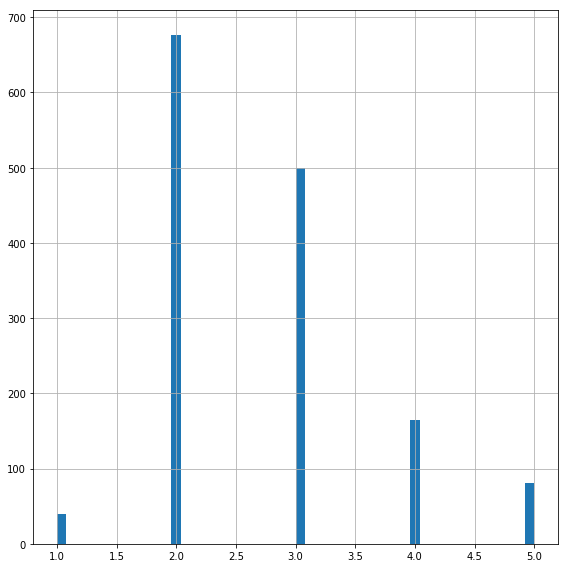

In [5]:
house_data["cleanSalePrice"].hist(bins = 50, figsize = (8,8))
plt.tight_layout()
plt.show()

In [6]:
#do stratified sampling based on that sale price
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size = 0.2, random_state = 42)
for train_index, test_index in split.split (house_data,  house_data["cleanSalePrice"]):
    strat_train_set = house_data.loc[train_index]
    strat_test_set = house_data.loc [test_index]
    
# see the distribution for training set 
strat_test_set["cleanSalePrice"].value_counts()/ len(strat_test_set)

2.0    0.462329
3.0    0.342466
4.0    0.113014
5.0    0.054795
1.0    0.027397
Name: cleanSalePrice, dtype: float64

In [7]:
 # now after the split, drop the cleanSalePrice column so data is in original state
for set_ in (strat_train_set, strat_test_set):
    set_.drop ("cleanSalePrice", axis=1, inplace = True)